## Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## About Data Set[ Train Data Set]

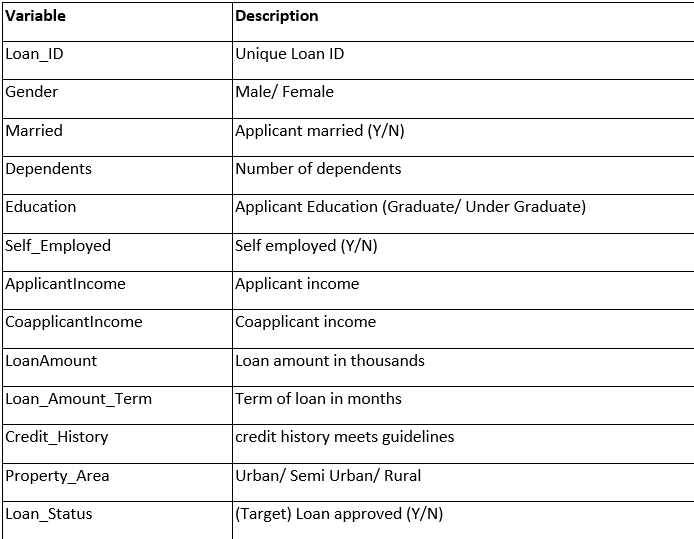

## Load Libraries

In [171]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


import time
from sklearn import metrics

In [172]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load DataSet

In [173]:
df=pd.read_csv('train_ctrUa4K.csv')

In [174]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104.0,360.0,1.0,Semiurban,Y
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
249,LP001825,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
196,LP001666,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y
559,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y
564,LP002832,Male,Yes,2,Graduate,No,8799,0.0,258.0,360.0,0.0,Urban,N
93,LP001322,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [4]:
# number of rows and columns
df.shape

(614, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
## check for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
## missing values in percentage
percentage_missing=df.isnull().sum()*100/len(df)

In [71]:
percentage_missing

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

We have very small percentage of missing values, but since the rows are not many, we will impute instead of dropping these rows

## Handling Missing Values
- We will use sklearn impute class to handle missing data

In [175]:
from sklearn.impute import SimpleImputer
import numpy as np

#### Missing Values Categorical Data

In [176]:

imputer = SimpleImputer(strategy='most_frequent')

df['Gender'] = imputer.fit_transform(df[['Gender']])
df['Dependents'] = imputer.fit_transform(df[['Dependents']])
df['Married'] = imputer.fit_transform(df[['Married']])
df['Education'] = imputer.fit_transform(df[['Education']])
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']])
df['Property_Area'] = imputer.fit_transform(df[['Property_Area']])


#### Missing Values Numerical Data

In [177]:

imp_mean = SimpleImputer(strategy='mean')

df['LoanAmount'] = imp_mean.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imp_mean.fit_transform(df[['Loan_Amount_Term']])

imp_mode = SimpleImputer(strategy='most_frequent')
df['Credit_History']= imp_mode.fit_transform(df[['Credit_History']])

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [73]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002738,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

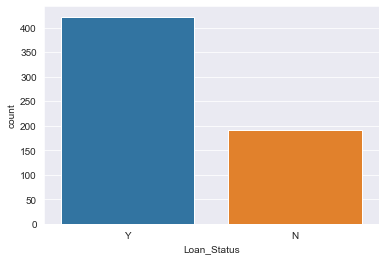

In [78]:
## Target Value
sns.countplot(x=df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

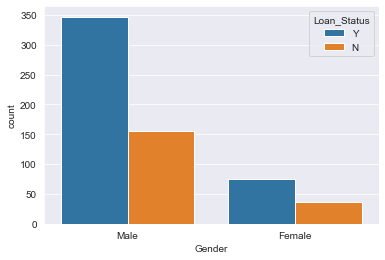

In [86]:
# Gender
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

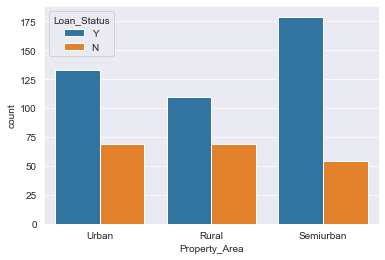

In [87]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

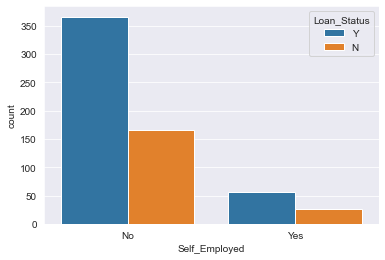

In [88]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

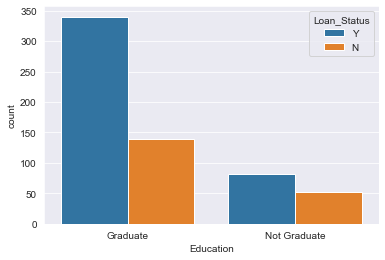

In [89]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

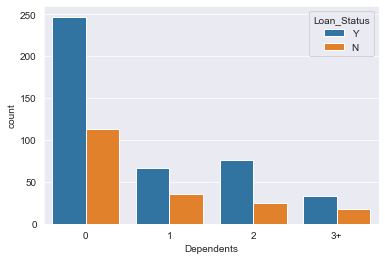

In [90]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

In [92]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Will need to convert Dependents to Categorical Data

<AxesSubplot:xlabel='Married', ylabel='count'>

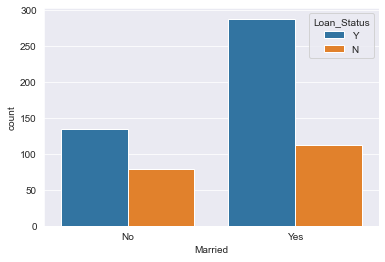

In [91]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

In [94]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
num = df.select_dtypes(exclude='object')

In [108]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.000000,146.412162,360.0,1.0
1,4583,1508.000000,128.000000,360.0,1.0
2,3000,0.000000,66.000000,360.0,1.0
3,2583,2358.000000,120.000000,360.0,1.0
4,6000,0.000000,141.000000,360.0,1.0
5,5417,4196.000000,267.000000,360.0,1.0
6,2333,1516.000000,95.000000,360.0,1.0
7,3036,2504.000000,158.000000,360.0,0.0
8,4006,1526.000000,168.000000,360.0,1.0
9,12841,10968.000000,349.000000,360.0,1.0


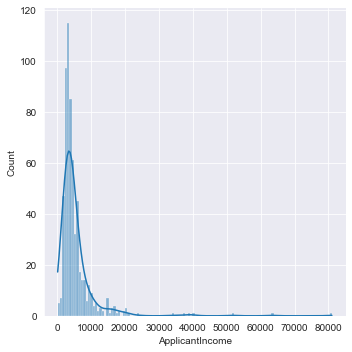

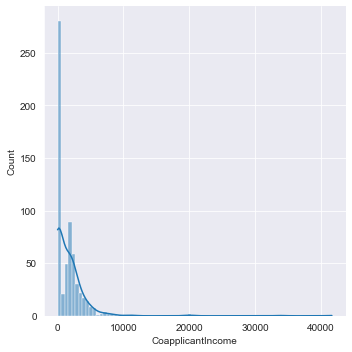

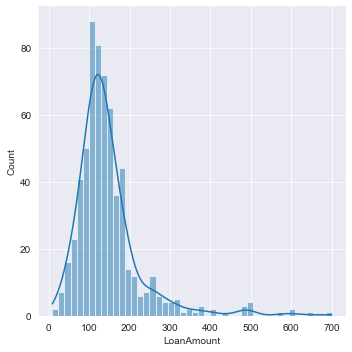

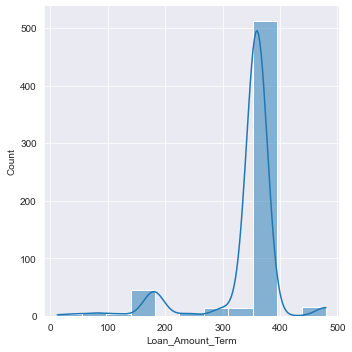

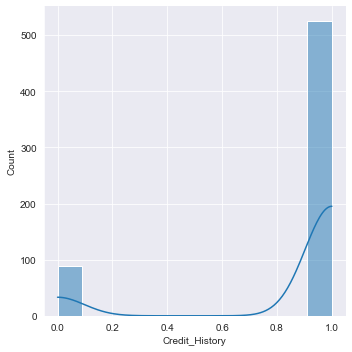

In [111]:
## Distribution plots for numerical data
for i in range(len(num.columns)):   
    sns.displot(num.iloc[:,i],kde=True)
    plt.xlabel(num.columns[i])

plt.tight_layout()
plt.show()

## Feature Engineering


In [114]:
from sklearn import preprocessing

## Target Variable

In [178]:
# replace Y with 1 and N with 0
df['Loan_Status'].replace({
    'Y':1,
    'N':0
},inplace=True)

In [179]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

## Label Encoding for Categorical Columns

In [180]:

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed']) 
df['Property_Area']= label_encoder.fit_transform(df['Property_Area']) 
df['Married']= label_encoder.fit_transform(df['Married']) 

In [181]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Handling Imbalanced data using SMOTE

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
sm = SMOTE(random_state=123)
X, y = sm.fit_sample(X, y)
y.value_counts()

Loan_Status
Y              422
N              422
dtype: int64

In [184]:
## Independent and Dependent Features
y=df[['Loan_Status']]


In [185]:
X=df.drop(['Loan_Status','Loan_ID'],axis=1)

## Split dataset

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)

In [188]:
X_train.shape

(491, 11)

In [189]:
X_test.shape

(123, 11)

In [190]:
y_train.shape

(491, 1)

In [191]:
y_test.shape

(123, 1)

## Scale our data

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [193]:
X_train

array([[ 0.43458254, -1.39922526, -0.75253152, ...,  0.28705101,
         0.41453312,  0.00514304],
       [ 0.43458254,  0.71468121, -0.75253152, ...,  0.01652885,
         0.41453312, -1.25747251],
       [ 0.43458254,  0.71468121,  1.18198667, ..., -0.61468953,
         0.41453312, -1.25747251],
       ...,
       [ 0.43458254,  0.71468121, -0.75253152, ...,  0.28705101,
         0.41453312,  1.26775858],
       [-2.30105884, -1.39922526,  2.14924577, ...,  0.28705101,
         0.41453312, -1.25747251],
       [ 0.43458254,  0.71468121, -0.75253152, ...,  0.28705101,
         0.41453312,  0.00514304]])

In [194]:
X_test

array([[ 0.43458254, -1.39922526,  0.21472758, ...,  0.28705101,
         0.41453312,  1.26775858],
       [-2.30105884,  0.71468121, -0.75253152, ...,  0.28705101,
         0.41453312,  0.00514304],
       [ 0.43458254, -1.39922526, -0.75253152, ...,  0.28705101,
         0.41453312, -1.25747251],
       ...,
       [ 0.43458254,  0.71468121, -0.75253152, ...,  0.28705101,
         0.41453312,  1.26775858],
       [ 0.43458254,  0.71468121, -0.75253152, ...,  2.09053209,
        -2.41235247,  1.26775858],
       [ 0.43458254,  0.71468121,  1.18198667, ...,  0.28705101,
        -2.41235247,  0.00514304]])

## Modeling

In [195]:
"""
    K-Nearest Neighbors
    Support Vector Machines
    Decision Tree Classifiers
    Random Forests
    Naive Bayes
    Multi-layer perceptron
    Logistic Regression
    Gradient Boosting 
    Extra Tree 
    Adaboost
    Ridge
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ml = [
    neighbors.KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LinearSVC(),
    GaussianNB(),
    MLPClassifier(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]

In [196]:
def eval_model(algo ,X, y):
   
    # Fit model
    start = time.time()
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    end = time.time()
    # Evaluate model
    name = algo.__class__.__name__
#     print(name)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    duration = end - start
    
    return [name, accuracy, precision, recall, auc, f1_score, duration]

In [197]:
results = []

for algo in ml:
    results.append(eval_model(algo, X, y))
                   
performance = pd.DataFrame(results, 
                           columns=['Name', 'Accuracy', 'Precision', 'Recall', "AUC", "F1 Score", 'Run Time']
                          ).sort_values(by='F1 Score', ascending=False)
performance

,Name,Accuracy,Precision,Recall,AUC,F1 Score,Run Time
2,LinearSVC,0.813008,0.798077,0.976471,0.711920,0.878307,0.020008
5,RidgeClassifier,0.813008,0.798077,0.976471,0.711920,0.878307,0.003000
10,LogisticRegression,0.813008,0.798077,0.976471,0.711920,0.878307,0.000000
6,AdaBoostClassifier,0.804878,0.801980,0.952941,0.713313,0.870968,0.075000
3,GaussianNB,0.796748,0.800000,0.941176,0.707430,0.864865,0.000000
0,KNeighborsClassifier,0.788618,0.792079,0.941176,0.694272,0.860215,0.014990
9,RandomForestClassifier,0.788618,0.797980,0.929412,0.701548,0.858696,0.135884
4,MLPClassifier,0.780488,0.784314,0.941176,0.681115,0.855615,0.816192
7,GradientBoostingClassifier,0.780488,0.784314,0.941176,0.681115,0.855615,0.090039
1,DecisionTreeClassifier,0.796748,0.857143,0.847059,0.765635,0.852071,0.003001


## Select Model and Evaluate